# 로이터 뉴스 분류하기 - LSTM

## 1.데이터탐색

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data()
len(X_train),len(X_test) 

2121728/2110848 [==============================] - 0s 0us/step


(8982, 2246)

In [6]:
# 카테고리 개수
max(y_train) + 1

46

In [7]:
# 첫 번째 뉴스 
print(X_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [9]:
type(reuters.get_word_index())

565248/550378 [==============================] - 0s 0us/step


dict

In [10]:
reuters.get_word_index()['the']

1

In [11]:
index_word = {}
for key, value in reuters.get_word_index().items():
    index_word[value] = key
len(index_word)

30979

In [12]:
# 첫 번째 기사
' '.join(index_word[index] for index in X_train[0])

'the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [17]:
# 뉴스 기사의 길이
max(len(s) for s in X_train), sum(map(len, X_train)) / len(X_train)

(2376, 145.5398574927633)

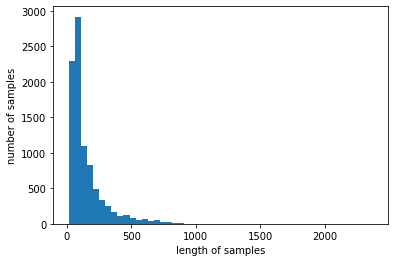

In [23]:
plt.hist([len(s) for s in X_train], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

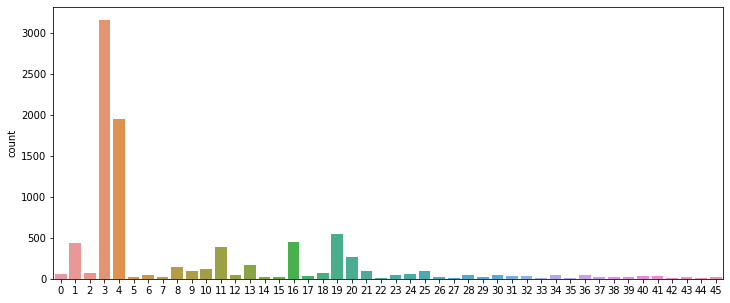

In [27]:
# 뉴스 그룹의 분포
plt.figure(figsize = (12, 5))
sns.countplot(y_train);

### LSTM으로 로이터 뉴스 분류
- 문장 길이 : 100단어(최대 2,376)
- 단어 : 빈도수 기준 1000단어(총 단어 수 : 30,979)

In [29]:
sentence = [len(s) for s in X_train if len(s) <= 100]
len(sentence)

4834

In [3]:
max_words = 1000
max_len = 100
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words = max_words, test_split = 0.2
)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [6]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
# 이게 뭐임
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [7]:
X_test.shape, X_train.shape, Y_test.shape, Y_train.shape, 

((2246, 100), (8982, 100), (2246, 46), (8982, 46))

## 3.모델정의 및 설정, 학습

In [8]:
model = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    LSTM(100),
    Dense(46, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           64000     
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 134,646
Trainable params: 134,646
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile('adam', 'categorical_crossentropy',['accuracy'])

In [14]:
model_path = 'best-truters-lstm.h5'
mc = ModelCheckpoint(model_path, verbose=1, save_best_only=True)
es = EarlyStopping(patience=20)

In [15]:
hist = model.fit(
    X_train, Y_train, validation_split = 0.2,
    epochs = 100, batch_size = 128, callbacks = [mc, es]
)

Epoch 1/100
55/57 [===========================>..] - ETA: 0s - loss: 0.7063 - accuracy: 0.8190
Epoch 1: val_loss improved from inf to 1.34641, saving model to best-truters-lstm.h5
57/57 [==============================] - 1s 14ms/step - loss: 0.7068 - accuracy: 0.8188 - val_loss: 1.3464 - val_accuracy: 0.6973
Epoch 2/100
56/57 [============================>.] - ETA: 0s - loss: 0.7097 - accuracy: 0.8150
Epoch 2: val_loss improved from 1.34641 to 1.32553, saving model to best-truters-lstm.h5
57/57 [==============================] - 1s 12ms/step - loss: 0.7103 - accuracy: 0.8149 - val_loss: 1.3255 - val_accuracy: 0.7117
Epoch 3/100
55/57 [===========================>..] - ETA: 0s - loss: 0.6832 - accuracy: 0.8264
Epoch 3: val_loss did not improve from 1.32553
57/57 [==============================] - 1s 13ms/step - loss: 0.6833 - accuracy: 0.8264 - val_loss: 1.3342 - val_accuracy: 0.7101
Epoch 4/100
56/57 [============================>.] - ETA: 0s - loss: 0.6262 - accuracy: 0.8422
Epoch 4: 

In [17]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

71/71 [==============================] - 1s 6ms/step - loss: 1.3506 - accuracy: 0.6986


[1.3506227731704712, 0.6985752582550049]

### 학습과정 시각화

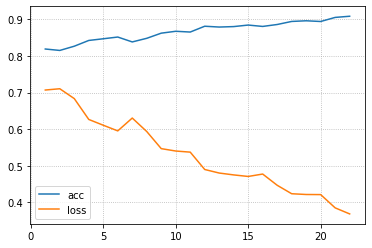

In [18]:
import matplotlib.pyplot as plt

y_acc = hist.history['accuracy']
y_loss = hist.history['loss']
xs = np.arange(1, len(y_acc)+1)

plt.plot(xs, y_acc, label = 'acc')
plt.plot(xs, y_loss, label = 'loss')
plt.legend(), plt.grid(linestyle = ':')
plt.show()